# Movies by Genre
This mini-project examines the movies by the genre to link the success of movies by their genre.

# 1 Importing necessary libraris and data
First, let's upload all the necessary libraries and data that will be used in the mini-project.

- Numpy, Pandas and Matplotlib are used for the basic manipulation of the data.

- Kagglehub is used to upload the data from the Kaggle directly. Path is used to link the path to the dataset from Kaggle

- Used dataset is [IMBd Dataset from 2006 to 2016](https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from pathlib import Path
path = kagglehub.dataset_download("PromptCloudHQ/imdb-data")
path = Path(path)
df = pd.read_csv(path / "IMDB-Movie-Data.csv")

# 2 Glimpse into a dataset

Here is the general information of the chosen dataset

In [9]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 3 Cleaning the data

In this section, we will clean the data by the following criteries:

- Delete the rows if they have any missing data

- Ratings > 7.5

- Year > 2010

In [12]:
df_clean = df.dropna()
df_clean = df_clean[df_clean["Rating"] > 7.5]
df_clean = df_clean[df_clean["Year"] > 2010]

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 979
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                106 non-null    int64  
 1   Title               106 non-null    object 
 2   Genre               106 non-null    object 
 3   Description         106 non-null    object 
 4   Director            106 non-null    object 
 5   Actors              106 non-null    object 
 6   Year                106 non-null    int64  
 7   Runtime (Minutes)   106 non-null    int64  
 8   Rating              106 non-null    float64
 9   Votes               106 non-null    int64  
 10  Revenue (Millions)  106 non-null    float64
 11  Metascore           106 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.8+ KB


In [73]:
df_clean.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000
mean,309.698113,2013.858491,126.122642,7.917925,3.432156e+05,128.516887,76.330189
std,261.100790,1.675815,22.826761,0.241344,2.436510e+05,152.227202,10.695546
min,1.000000,2011.000000,66.000000,7.600000,4.370000e+03,0.090000,37.000000
25%,107.000000,2012.250000,108.000000,7.800000,1.439205e+05,18.055000,71.000000
50%,237.500000,2014.000000,123.500000,7.900000,3.217205e+05,71.275000,76.000000
75%,448.750000,2015.000000,139.750000,8.100000,4.802745e+05,181.980000,83.000000
max,980.000000,2016.000000,187.000000,8.600000,1.222645e+06,936.630000,100.000000


In [75]:
df_clean

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
11,12,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.27,74.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
13,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
889,890,50/50,"Comedy,Drama,Romance","Inspired by a true story, a comedy centered on...",Jonathan Levine,"Joseph Gordon-Levitt, Seth Rogen, Anna Kendric...",2011,100,7.7,281625,34.96,72.0
903,904,How to Train Your Dragon 2,"Animation,Action,Adventure",When Hiccup and Toothless discover an ice cave...,Dean DeBlois,"Jay Baruchel, Cate Blanchett, Gerard Butler, C...",2014,102,7.9,237565,177.00,76.0
950,951,Me and Earl and the Dying Girl,"Comedy,Drama","High schooler Greg, who spends most of his tim...",Alfonso Gomez-Rejon,"Thomas Mann, RJ Cyler, Olivia Cooke, Nick Offe...",2015,105,7.8,92076,6.74,74.0
957,958,End of Watch,"Crime,Drama,Thriller","Shot documentary-style, this film follows the ...",David Ayer,"Jake Gyllenhaal, Michael Peña, Anna Kendrick, ...",2012,109,7.7,192190,40.98,68.0


# 3 Creating a new dataset with Genres as Indices

Now we will create a new dataset that we will be using from now on. New dataset will genres as indices. The columns of the dataset will be:

- Avg Rating: average rating of the movies with the genre

- Avg Revenue: average revenue of the movies with the genre

- Avg Metascore: average metascore of the movies with the genre

- Percentage: percentage of the movies with the genre

Besides that, genres with percentage lower than 10% appearance in the main dataset were filtered out

In [76]:
genres = []
for cell in df_clean["Genre"]:
  cell_genres = cell.split(",")
  for genre in cell_genres:
    if genre not in genres:
      genres.append(genre)

In [77]:
df_genres = pd.DataFrame(index = genres, columns=["Avg Rating", "Avg Revenue", "Avg Metascore", "Percentage"])

In [85]:
total_amount = 106
for genre in df_genres.index:
  total_rating = 0
  total_rev = 0
  total_met = 0
  amount = 0
  for index, row in df_clean.iterrows():
    if genre in row["Genre"]:
      total_rating += row["Rating"]
      total_rev += row["Revenue (Millions)"]
      total_met += row["Metascore"]
      amount += 1

  df_genres.at[genre, "Avg Rating"] = total_rating / amount
  df_genres.at[genre, "Avg Revenue"] = total_rev / amount
  df_genres.at[genre, "Avg Metascore"] = total_met / amount
  df_genres.at[genre, "Percentage"] = amount / total_amount


In [86]:
for col in df_genres:
  df_genres[col] = df_genres[col].astype(float)

df_genres["Percentage"] *= 100

In [87]:
df_genres = df_genres.round(2)

In [88]:
df_genres = df_genres[df_genres["Percentage"] > 11]

In [89]:
df_genres

,Avg Rating,Avg Revenue,Avg Metascore,Percentage
Action,7.88,272.02,73.46,24.53
Adventure,7.91,253.30,76.03,32.08
Sci-Fi,7.95,237.53,76.12,16.04
Comedy,7.91,86.02,74.93,26.42
Drama,7.93,69.14,76.92,70.75
Biography,7.98,80.40,77.00,14.15
Crime,7.88,60.78,75.08,11.32
Thriller,7.87,114.97,78.93,13.21
Romance,7.85,48.86,74.00,12.26


# 4 Plotting

We plotted two bar charts:

- Genre Vs. Avg Revenue

- Genre Vs. Percentage

(0.0, 100.0)

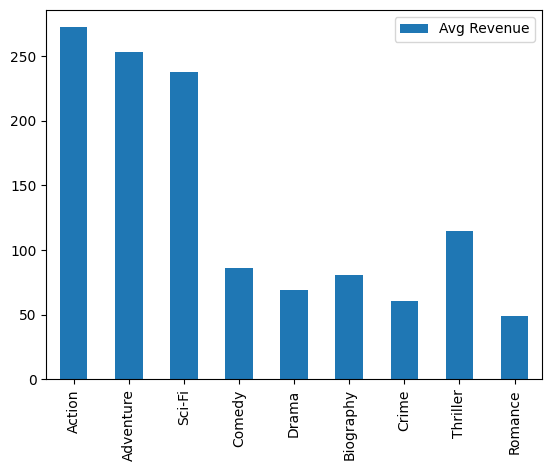

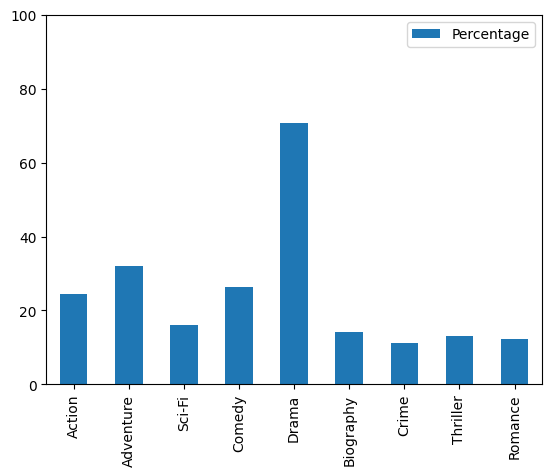

In [90]:
plot_by_revenue = df_genres.plot(kind="bar", y=["Avg Revenue"])
plot_by_perc = df_genres.plot(kind="bar", y = ["Percentage"])
plot_by_perc.set_ylim(0, 100)

# 5 Conclusions

From the two bar charts we can conclude that:

- Although, Drama is the most common movie genre, its revenue is equivalent to the most of the other genres. It is probably because the Drama is the most common genre;  

- Sci-Fi, Adventure and Action are the most succesfull movie genres by revenue, even though, their percentage appearance is a little higher than the average percentage appearance of the other movie genres.